# Ridge Regression Example

This notebook demonstrates how Ridge Regression helps prevent overfitting and handles outliers better than OLS regression. We'll create synthetic data with:
1. 30 points along y=2x line with small noise
2. 3 outlier points
3. Compare OLS vs Ridge Regression fits

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generate synthetic data
n = 30  # number of regular points

# Generate X input
X_input = np.linspace(0, 10, n)

# Generate Y with small noise (y = 2x + noise)
np.random.seed(42)  # for reproducibility
Y = 2 * X_input + np.random.normal(0, 0.5, n)

# Add outliers
X_outliers = np.array([15, 18, 20])
Y_outliers = np.array([80, 90, 100])

# Combine regular points and outliers
X_input = np.concatenate([X_input, X_outliers])
Y = np.concatenate([Y, Y_outliers])

# Add column of ones for intercept term
X = np.column_stack([np.ones_like(X_input), X_input])

In [4]:
# Ordinary Least Squares (OLS) Solution
beta_ols = np.linalg.inv(X.T @ X) @ X.T @ Y

# Ridge Regression Solution
lambda_ridge = 1000  # regularization parameter
n = len(X)
beta_ridge = np.linalg.inv(X.T @ X + lambda_ridge * np.eye(2)) @ X.T @ Y

print("OLS Coefficients (intercept, slope):", beta_ols)
print("Ridge Coefficients (intercept, slope):", beta_ridge)

OLS Coefficients (intercept, slope): [-11.4297939    4.65202461]
Ridge Coefficients (intercept, slope): [0.09810221 2.29476954]


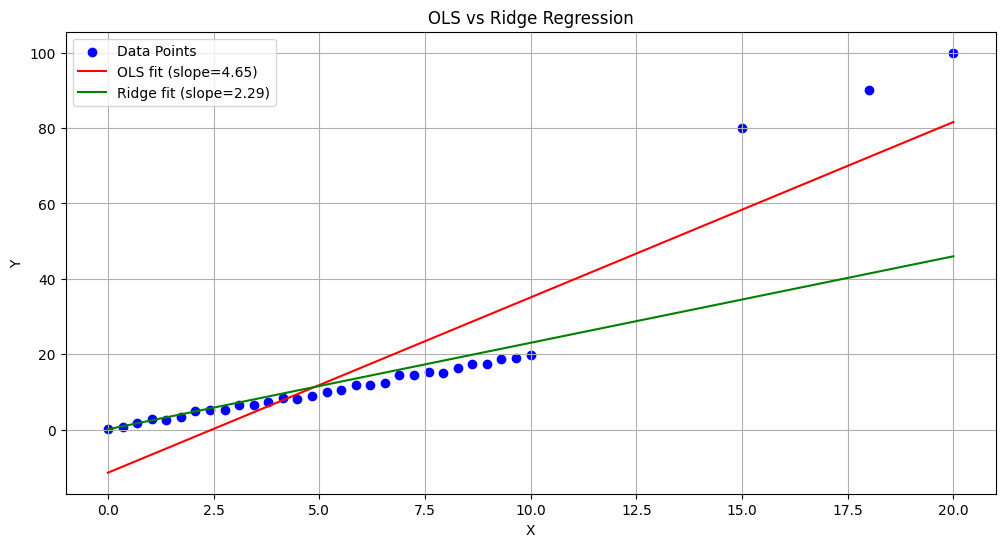

In [5]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot data points
plt.scatter(X_input, Y, color='blue', label='Data Points')

# Plot OLS fit
x_plot = np.array([0, max(X_input)])
y_ols = beta_ols[0] + beta_ols[1] * x_plot
plt.plot(x_plot, y_ols, color='red', label=f'OLS fit (slope={beta_ols[1]:.2f})')

# Plot Ridge fit
y_ridge = beta_ridge[0] + beta_ridge[1] * x_plot
plt.plot(x_plot, y_ridge, color='green', label=f'Ridge fit (slope={beta_ridge[1]:.2f})')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('OLS vs Ridge Regression')
plt.legend()
plt.grid(True)
plt.show()